# Introduction 

Le but de ce TP est de manipuler des données de GWAS quantitative, et d'explorer comment des algorithmes de machine learning peuvent être utiliser pour les analyser. Nous allons travailler avec les génotypes de 89 individus du [1000 Genomes Project](http://www.internationalgenome.org/data), d'origine Han ou japonaise, et un phénotype quantitatif (c'est-à-dire à valeurs réelles) simulé. On peut imaginer que ce phénotype quantifie la réponse de ces 89 individus à un traitement.

## Compte-rendu noté
Le compte-rendu du TP sera à rendre avant le __19 octobre 2017 (23h59)__, sous forme d'un fichier `<NomDeFamille>_<Prenom>.ipynb` à déposer [ici](https://cazencott.info/owncloud/index.php/s/2ARJtzeXqKiul3S). 

## Notebook Jupyter

Jupyter est une application web qui vous permet de créer et partager des documents appelés _notebooks_ (tels que ce notebook .ipynb) qui contient du code modifiable et exécutable, des visualisations, et du texte explicatoire qui peut être formaté avec une syntaxe markdown simple et contenir des équations.

Quelques éléments concernant l'utilisation des notebooks Jupyter :
* Chaque bloc éditable est contenu dans une cellule (_cell_). Un cellule peut contenit du texte brut (_raw text_), du code, ou du texte formatté avec la syntaxe markdown, comme cette cellule. Pour plus d'information sur la syntaxe markdown, suivez le [guide](http://jupyter-notebook.readthedocs.io/en/latest/examples/Notebook/Working%20With%20Markdown%20Cells.html) !
* Pour exécuter une cellule, il suffit de cliquer dessus et de taper Shift+Enter (ou d'utiliser le bouton Play dans la barre de menu).
* Pour créer une nouvelle cellule vide en-dessous de celle que vous allez exécuter, utilisez Alt+Enter au lieu de Shift+Enter.

Quelques éléments concernant l'utilisation d'un notebook Jupyter avec Python :
* Une cellule de code Python se comporte comme un shell Python interactif (et en particulier comme ipython, sur lequel est basé Jupyter). En particulier : 
  * Tabulation permet d'auto-compléter le mot-clé que vous avez commencé à taper
  * Taper un point d'interrogation après le nom d'un objet charge l'aide interactive pour cette fonction.
* Jupyter a des commandes Python spéciales (des raccourcis, en quelque sorte) qui s'appellent des _magics_. Par exemple, `%bash` permet d'exécuter du code bash (donc comme si vous étiez dans un terminal), `%paste` permet de coller un block de code précédemment copié (depuis le notebook ou une autre application) en conservant son formatage (et en particulier les indentations), et `%matplotlib inline` permet d'importer la librairie de visualisation de matplotlib et d'afficher les graphiques créés non pas dans une nouvelle fenêtre mais à l'intérieur du notebook. Vous trouverez une liste complète de _magics_ sur http://ipython.readthedocs.io/en/stable/interactive/magics.html 
* Pour en savoir plus sur le shell python interactif : http://ipython.readthedocs.io/en/stable/interactive/tutorial.html

Pour en savoir plus sur Jupyter : https://jupyter.org/

Email : nicolas.venedittan@outlook.com

In [1]:
2 + 2 # exécuter avec Shift+Enter

4

In [2]:
print("Hello world!") # exécuter avec Alt+Enter pour créer une nouvelle cellule

Hello world!


In [3]:
!ls # le ! permet de lancer le code dans un terminal bash plutôt que python

2017-10-05-m2bi.pdf				   mydata.log
assoc1.log					   plink.log
assoc1.qassoc					   simulated-gwas
m2bi-2017-intro-ml.pdf				   simulated-gwas.tar.gz
M2BI TP Recherche efficace de biomarqueurs .ipynb  simulated.map
mydata.bed					   simulated.ped
mydata.bim					   Untitled.ipynb
mydata.fam


# 1. GWAS avec PLINK

[PLINK](http://zzz.bwh.harvard.edu/plink/) est le logiciel le plus classiquement utilisé pour l'analyse de données GWAS. Il est développé et maintenu sous la responsabilité de [Shaun Purcell](http://zzz.bwh.harvard.edu/) à Harvard, le MGH et le Broad Institute.

[PLINK 1.9](https://www.cog-genomics.org/plink/1.9/) est actuellement en version beta.

## 1.1 Chargement des données

In [4]:
!tar zxvf simulated-gwas.tar.gz # le ! permet de lancer le code dans un terminal bash plutôt que python

simulated.ped
simulated.map


Les données sont au format PLINK, un format qui est fréquemment utilisé pour les données GWAS, y compris par d'autres logiciels que PLINK.

### File format
* `.ped` : Les échantillons. Un fichier ped contient une ligne par échantillon (= individu) dans les données, et (6 + 2 x nombre-de-SNPs) colonnes. Les 6 premières colonnes contiennent les informations suivantes :
  * FID ("Family Identifier") : l'identifiant de la famille de l'individu
  * IID ("Individual Identifier") : l'identifiant de l'individidu
  * PAT ("Paternal Identifier") : l'identifiant du père 
  * MAT ("Maternal Identifier") : l'identifiant de la mère
  * SEX : le sexe (1=male, 2=femelle, autre=inconnu)
  * PHENOTPYE : le phénotype.
Les colonnes suivantes décrivent les SNPs bialléliques : chaque SNP est encodé sur 2 colonnes, chacune correspondant à un brin d'ADN. L'encodage est soit {A, T, C, G}, soit {1, 2} (correspondant à l'un ou l'autre des allèles).

* `.map` : Les marqueurs. Un fichier map contient une ligne par SNP. Chaque SNP est décrit sur 4 colonnes : chromosome, identifiant du SNP, distance génétique en morgans, et position (basepair).

La documentation complète du format PLINK est [ici](http://zzz.bwh.harvard.edu/plink/data.shtml).

Nous allons commencer par vérifier que les données sont complètes et que PLINK fonctionne, et obtenir quelques informations sur nos données. 

In [5]:
!plink --noweb --file simulated # Remplacer `plink` par son chemin absolu si nécessaire.


@----------------------------------------------------------@
|        PLINK!       |     v1.07      |   10/Aug/2009     |
|----------------------------------------------------------|
|  (C) 2009 Shaun Purcell, GNU General Public License, v2  |
|----------------------------------------------------------|
|  For documentation, citation & bug-report instructions:  |
|        http://pngu.mgh.harvard.edu/purcell/plink/        |
@----------------------------------------------------------@

Skipping web check... [ --noweb ] 
Writing this text to log file [ plink.log ]
Analysis started: Thu Oct  5 14:16:26 2017

Options in effect:
	--noweb
	--file simulated

83534 (of 83534) markers to be included from [ simulated.map ]
89 individuals read from [ simulated.ped ] 
89 individuals with nonmissing phenotypes
Assuming a quantitative trait
Missing phenotype value is -9
89 males, 0 females, and 0 of unspecified sex
Before frequency and genotyping pruning, there are 83534 SNPs
89 founders and 0 non-f

### Contrôle de qualité

Nous allons maintenant appliquer quelques filtres de __contrôle de qualité__ :

* Enlever les SNPs avec une fréquence d'allèle mineur (minor allele frequency, MAF) plus faible que 1% : `--maf 0.01`
* Enlever les SNPs pour lesquelles nous n'avons pas de données pour plus de 10% des individus : `--geno 0.1`
* Enlever les SNPs qui ne sont pas en équilibre de Hardy-Weinberg (HWE), avec une p-valeur supérieure à 1e-6, car ils sont susceptibles d'avoir été mal génotypés : `--hwe 1e-6` 

Nous allons aussi créer une version binaire du fichier ped, appelé `.bed`, qui va prendre moins d'espace disque et accélérer les analyses.

In [6]:
!plink --noweb --file simulated --maf 0.01 --hwe 1e-6 --geno 0.1 --make-bed --out mydata


@----------------------------------------------------------@
|        PLINK!       |     v1.07      |   10/Aug/2009     |
|----------------------------------------------------------|
|  (C) 2009 Shaun Purcell, GNU General Public License, v2  |
|----------------------------------------------------------|
|  For documentation, citation & bug-report instructions:  |
|        http://pngu.mgh.harvard.edu/purcell/plink/        |
@----------------------------------------------------------@

Skipping web check... [ --noweb ] 
Writing this text to log file [ mydata.log ]
Analysis started: Thu Oct  5 14:16:29 2017

Options in effect:
	--noweb
	--file simulated
	--maf 0.01
	--hwe 1e-6
	--geno 0.1
	--make-bed
	--out mydata

83534 (of 83534) markers to be included from [ simulated.map ]
89 individuals read from [ simulated.ped ] 
89 individuals with nonmissing phenotypes
Assuming a quantitative trait
Missing phenotype value is -9
89 males, 0 females, and 0 of unspecified sex
Before frequency and g

__Question :__ Combien de SNPs ont passé le contrôle de qualité (i.e. combien de SNPs allons-nous analyser) ?

__Réponse__ 66536

La commande `--out -mydata` nous a permis de créer les fichiers suivants :
* `mydata.bed` : la version binaire du fichier `.ped` (moins les SNPs filtrés) ;
* `mydata.bim` : une version augmentée du fichier `.map`, contenant deux colonns supplémentaires donannt les noms des allèles ;
* `mydata.fam` : les 6 premières colonnes du fichier `.ped`.

PLINK a aussi créé un fichier `.log` qui contient les sorties que vous voyez à l'écran.

## 1.2 GWAS

Nous allons utiliser PLINK pour tester individuellement l'association statistique entre chaque SNP et le phénotype.

In [7]:
!plink --noweb --bfile mydata --assoc --out assoc1


@----------------------------------------------------------@
|        PLINK!       |     v1.07      |   10/Aug/2009     |
|----------------------------------------------------------|
|  (C) 2009 Shaun Purcell, GNU General Public License, v2  |
|----------------------------------------------------------|
|  For documentation, citation & bug-report instructions:  |
|        http://pngu.mgh.harvard.edu/purcell/plink/        |
@----------------------------------------------------------@

Skipping web check... [ --noweb ] 
Writing this text to log file [ assoc1.log ]
Analysis started: Thu Oct  5 14:16:33 2017

Options in effect:
	--noweb
	--bfile mydata
	--assoc
	--out assoc1

Reading map (extended format) from [ mydata.bim ] 
66536 markers to be included from [ mydata.bim ]
Reading pedigree information from [ mydata.fam ] 
89 individuals read from [ mydata.fam ] 
89 individuals with nonmissing phenotypes
Assuming a quantitative trait
Missing phenotype value is -9
89 males, 0 females, and 

Le fichier `assoc1.qassoc` contient les résultats des tests. 

Pour chaque SNP, PLINK a calculé une régression entre ce SNP et le phénotype. Il nous donne entre autre :
* BETA : le coefficient de cette régression, qui peut être interprété comme la taille de l'effet ;
* R2 : le coefficient de corrélation entre le phénotype réel et celui prédit par cette régression, qui peut être interprété comme la proportion de la variance phénotypique expliquée par le SNP ;
* P : la p-valeur du test statistique de Wald qui évalue si BETA est significativement différent de zéro.

__Question__ Quel est le SNP le plus significativement associé avec le phénotype ?

In [15]:
!sort --key=9 -r --general-numeric-sort assoc1.qassoc | head -10  # Réponse

   8   rs3808434      43867       89     0.2042    0.04994     0.1612    4.089    9.623e-05 
  11    rs211146      54891       89    -0.1565    0.03826     0.1613   -4.091    9.574e-05 
  11   rs2283233      54892       89    -0.1554    0.03732     0.1662   -4.164    7.333e-05 
   1  rs12045968        861       89     0.2169    0.04525      0.209    4.794    6.696e-06 
   3   rs2470764      16983       89    -0.2028    0.04758     0.1728   -4.264    5.089e-05 
   3   rs1905017      16982       89    -0.2028    0.04758     0.1728   -4.264    5.089e-05 
  13   rs1467601      61964       89     0.1739    0.04118     0.1701    4.223    5.907e-05 
  11   rs1015896      54887       89    -0.2669    0.03154     0.4516   -8.464    5.608e-13 
   4   rs4279260      24660       89     0.1735    0.04041     0.1749    4.294    4.548e-05 
   3   rs1403436      16984       89    -0.1889    0.04314     0.1806   -4.379    3.308e-05 
sort: échec d'écriture: 'sortie standard': Relais brisé (pipe)
sort: e

## 1.3 Analyse des résultats en Python

Nous allons utiliser Python pour analyser les résultats. 

Nous allons utiliser en particulier une librairie appelée `pandas` pour manipuler les données. 

In [16]:
# Importer pandas
import pandas as pd
# Lire la sortie de PLINK dans un objet pandas appelé df (pour dataFrame)
df = pd.read_csv('assoc1.qassoc', # nom du fichier
                 delim_whitespace=True) # utiliser tout espace comme séparateur

In [17]:
# Visualiser l'objet en question
print(df)

       CHR         SNP     BP  NMISS      BETA       SE        R2        T  \
0        1   rs6681049      1     89 -0.041220  0.04808  0.008377 -0.85730   
1        1   rs4074137      2     89 -0.013890  0.07988  0.000347 -0.17380   
2        1   rs1891905      4     89 -0.015330  0.04204  0.001527 -0.36470   
3        1   rs9729550      5     89  0.030830  0.06171  0.002861  0.49960   
4        1   rs3813196      6     89  0.091870  0.13620  0.005198  0.67430   
5        1  rs12044597     11     89  0.025280  0.05010  0.002920  0.50470   
6        1  rs10907185     12     89 -0.087420  0.04872  0.035690 -1.79400   
7        1  rs11260616     13     89  0.002172  0.05845  0.000016  0.03717   
8        1    rs745910     14     89  0.085970  0.05798  0.024650  1.48300   
9        1   rs2803291     15     89  0.062540  0.06285  0.011260  0.99520   
10       1    rs262688     17     89  0.022200  0.05959  0.001593  0.37260   
11       1   rs2460000     18     89 -0.029770  0.05066  0.00395

In [19]:
# Trier les SNPs par p-valeur
df_sorted = df.sort_values('P')

__Question__ Afficher les 10 SNPs avec la plus petite p-valeur.

In [23]:
print(df_sorted[0:10]) # Réponse

       CHR         SNP     BP  NMISS    BETA       SE      R2      T  \
43968   11   rs1015896  54887     89 -0.2669  0.03154  0.4516 -8.464   
12345    3    rs920160  15796     89  0.2401  0.03937  0.2995  6.099   
43970   11    rs524657  54889     89 -0.2093  0.04063  0.2336 -5.150   
683      1  rs12045968    861     89  0.2169  0.04525  0.2090  4.794   
13279    3   rs1403436  16984     89 -0.1889  0.04314  0.1806 -4.379   
19467    4   rs4279260  24660     89  0.1735  0.04041  0.1749  4.294   
13278    3   rs2470764  16983     89 -0.2028  0.04758  0.1728 -4.264   
13277    3   rs1905017  16982     89 -0.2028  0.04758  0.1728 -4.264   
49603   13   rs1467601  61964     89  0.1739  0.04118  0.1701  4.223   
43973   11   rs2283233  54892     89 -0.1554  0.03732  0.1662 -4.164   

                  P  
43968  5.608000e-13  
12345  2.870000e-08  
43970  1.602000e-06  
683    6.696000e-06  
13279  3.308000e-05  
19467  4.548000e-05  
13278  5.089000e-05  
13277  5.089000e-05  
49603  5.

### Seuil de significativité

__Question__ Combien de tests statistiques PLINK a-t-il fait ?

__Réponse__ 66536

__Question__ Prenons un seuil de significativité de 0.05. Calculer le seuil `sig_thresh` corrigé par correction de Bonferroni.

In [26]:
sig_thresh = 0.05/66536
print (sig_thresh) # Réponse

7.514728868582422e-07


Nous pouvons maintenant identifier les SNPs significativement associés avec le phénotype.

In [35]:
sig_SNPs = df.SNP[df.P < sig_thresh]
for snp in sig_SNPs:
    print(df[df.SNP == snp])

       CHR       SNP     BP  NMISS    BETA       SE      R2      T  \
12345    3  rs920160  15796     89  0.2401  0.03937  0.2995  6.099   

                  P  
12345  2.870000e-08  
       CHR        SNP     BP  NMISS    BETA       SE      R2      T  \
43968   11  rs1015896  54887     89 -0.2669  0.03154  0.4516 -8.464   

                  P  
43968  5.608000e-13  


__Question__ Quels SNPs sont associés avec le phénotype ? Sur quel(s) chromosome(s) sont-ils situés ?

__Réponse__ SNP rs920160 => CHR 3 <br> 
SNP rs1015896 => CHR 11

### Manhattan plot

Nous allons visualiser nos résultats avec un _diagramme de Manhattan_ : nous allons afficher chaque SNP selon, en abscisse, sa position génomique, et, en ordonnée, leur p-valeur (ou plutôt, -10 log(p)). Nous allons aussi colorer chaque chromosome d'une couleur différente.

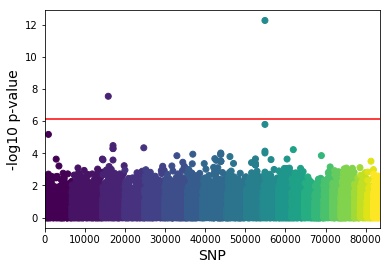

In [46]:
import numpy as np # librairie pour pythom numérique 
from matplotlib import pyplot as plt # librairie pour créer des figures

# Manhattan plot
plt.scatter(df.BP, # x = SNP position (in bp)
            -np.log10(df.P), # y = -log10 p-value 
            c=df.CHR) # couleur par chromosome

# Enjoliver
plt.xlabel("SNP", fontsize=14)
plt.ylabel("-log10 p-value", fontsize=14)
plt.xlim([0, max(df.BP)])
plt.hlines(-np.log10(sig_thresh),0,max(df.BP),color="red")
plt.show(block=False)

# Pour sauvegarder l'image
# plt.savefig('manhattan.png', bbox_inches='tight')

__Question__ Reproduire le graphique ci-dessus en y rajoutant une ligne horizontale correspondant au seuil de significativité.

In [ ]:
# Réponse

### Q-Q plot

Un _diagramme quantile-quantile_ nous permet de visualiser la distribution des p-valeurs, et si elle dévie significativement de la distribution uniforme. Nous nous attendons en effet à ce que la plupart des SNPs ne soient pas associés avec le phénotype, et par conséquence à ce que leurs p-valeurs soient distribuées uniformément. Une déviation visible de la distribution uniforme indque que l'analyse est biaisée, vraisemblablement par une structure de population.

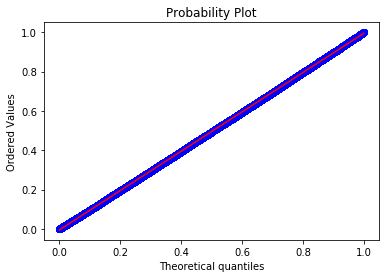

In [47]:
import scipy.stats as ss
ss.probplot(df.P, dist="uniform", plot=plt)
plt.show(block=False)

Notre diagramme quantile-quantile correspond parfaitement à la diagonale. Cela indique qu'il n'y a pas de déviation par rapport à la distribution uniforme. Il y a peu de chance que l'analyse soit biaisée par la structure de population. 

En pratique, cela est due à la façon dont nous avons simulé les phénotypes : il est assez peu probable qu'une cohorte mélangeant des chinois Han et des japonais ne souffre pas d'un tel biais.

Les techniques généralement utilisées pour corriger ce genre de biais sont :
* utiliser les composantes principales (calculées par exemple avec [EIGENSTRAT](https://github.com/DReichLab/EIG/) comme covariables avec l'option --covar
* utiliser des modèles linéaires mixtes, par exemple avec l'outil [FastLMM](https://github.com/MicrosoftGenomics/FaST-LMM).

# 2. Approches d'apprentissage (machine learning)

Nous allons maintenant utiliser [scikit-learn](http://scikit-learn.org/stable/index.html), qui est la librairie Python de référence pour le machine learning (hors deep learning).

Pour cela, nous devons transformer nos données en une matrice (pour scikit-learn, un array numpy) X de n lignes et p colonnes, où n est le nombre d'échantillons et p le nombre de SNPs. Chaque SNP doit être représenté par un unique nombre. Nous allons utiliser un encodage _additif_ : 
* 0 pour un SNP homozygote avec l'allèle majeur (AA);
* 1 pour un SNP hétérozygote (Aa);
* 2 pour un SNP homozygote avec l'allèle mineur (aa).

PLINK nous permet d'effectuer cette transformation :

In [48]:
!plink --noweb --bfile mydata --recodeA --out mydata1


@----------------------------------------------------------@
|        PLINK!       |     v1.07      |   10/Aug/2009     |
|----------------------------------------------------------|
|  (C) 2009 Shaun Purcell, GNU General Public License, v2  |
|----------------------------------------------------------|
|  For documentation, citation & bug-report instructions:  |
|        http://pngu.mgh.harvard.edu/purcell/plink/        |
@----------------------------------------------------------@

Skipping web check... [ --noweb ] 
Writing this text to log file [ mydata1.log ]
Analysis started: Thu Oct  5 15:03:24 2017

Options in effect:
	--noweb
	--bfile mydata
	--recodeA
	--out mydata1

Reading map (extended format) from [ mydata.bim ] 
66536 markers to be included from [ mydata.bim ]
Reading pedigree information from [ mydata.fam ] 
89 individuals read from [ mydata.fam ] 
89 individuals with nonmissing phenotypes
Assuming a quantitative trait
Missing phenotype value is -9
89 males, 0 females, 

Nous venons de créer un fichier `mydata1.raw` qui contient une ligne par individu. Les 6 premières colonnes sont les habituelles `FID IID PAT MAT SEX PHENOTYPE`, et ensuite il y a une colonne par SNP. La première ligne est un en-tête.

### Lecture des données dans Python
Nous allons représenter 
* le phénotype comme un array numpy 1D `y` de longueur `num_samples` (n) 
* les génotypes comme un array numpy 2D `X` de taille `num_samples x num_snps` (n x p).

Pour cela, nous allons de nouveau utiliser `pandas`.

In [50]:
df = pd.read_csv('mydata1.raw',
                  delim_whitespace=True)
print(df[0:2])

      FID  IID  PAT  MAT  SEX  PHENOTYPE  rs6681049_1  rs4074137_1  \
0  HCB181    1    0    0    1   0.290579            0            0   
1  HCB182    1    0    0    1   0.754480            0            1   

   rs1891905_1  rs9729550_1     ...      rs7410608_1  rs4824149_1  \
0            1            0     ...                1            1   
1            1            1     ...                0            0   

   rs4824157_1  rs131817_2  rs131794_1  rs5770913_1  rs131750_1  rs2269380_1  \
0            0           0           0            1           1            0   
1            0           2           0            0           2            0   

   rs1001469_1  rs756638_1  
0            1           0  
1            1           0  

[2 rows x 66542 columns]


__Question__ Utiliser `iloc` pour créer les array `X` et `y` à partir de df.
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.iloc.html

In [56]:
X = np.array(df.iloc[0:len(df),6:]) # génotype
y = np.array(df.iloc[0:len(df),5]) # phénotype
print(X,y)

[[0 0 1 ..., 0 1 0]
 [0 1 1 ..., 0 1 0]
 [0 1 1 ..., 2 0 1]
 ..., 
 [1 0 0 ..., 1 1 1]
 [0 0 1 ..., 2 1 0]
 [0 0 0 ..., 0 1 1]] [ 0.290579   0.75448    0.758444   0.361467   1.14344    0.612501   0.342599
  0.335213   1.04442    1.09406    0.346519   0.570452   0.842389   0.822911
  0.58177    1.049      1.05523    0.341757   0.567039   0.539772   0.809159
  0.609363   0.608134   0.603511   0.316228   0.0787525  0.321135   0.530818
  0.334219   0.860866   0.858961   0.801332   0.342113   1.05991    0.58347
  0.253907   0.835248   0.567284   0.772149   0.503974   0.560663   0.801379
  1.12017    0.534523   1.09185    0.530812   1.09419    0.837739   1.3249
  1.03987    0.78328    0.550428   1.0609     0.55158    0.593942   1.30373
  0.30923    1.07902    0.527667   1.09075    0.859089   0.540727   1.30942
  0.0451066  0.563146   0.540203   0.835148   0.776821   0.572097   0.539729
  0.577217   1.04742    0.563793   0.530845   1.29499    0.884027   1.05943
  1.05588    1.05757    0.82702

PLINK a donné à chaque colonne SNP un identifiant de la forme `rsXXX_A` où `rsXXX` est le nom du SNP et `A` est `1` ou `2` selon lequel des deux est l'allèle mineur dans les données. Pour pouvoir faire correspondre ces noms de colonnes aux noms de SNPs que nous connaissons, il faut supprimer ce suffixe `_1` or `_2`.

__Question__ Remplacer les en-têtes des colonnes de `df` (à partir de la 7ème) en supprimant ce suffixe. Les en-têtes de colonnes sont accessibles grâce à `df.columns`.

In [57]:
tmp = []
for col in df.columns:
    tmp.append(col.split("_")[0])
df.columns = tmp
print(df.columns)

Index(['FID', 'IID', 'PAT', 'MAT', 'SEX', 'PHENOTYPE', 'rs6681049',
       'rs4074137', 'rs1891905', 'rs9729550',
       ...
       'rs7410608', 'rs4824149', 'rs4824157', 'rs131817', 'rs131794',
       'rs5770913', 'rs131750', 'rs2269380', 'rs1001469', 'rs756638'],
      dtype='object', length=66542)


## 2.1 Pourcentage de variance expliquée par les SNPs significatifs
Avant de mettre en place des modèles d'apprentissage, nous allons utiliser `scikit-learn` pour déterminer la fraction de la variance phénotypique de nos 89 individus qui est expliquée par les SNPs significatifs détectés avec PLINK.

Nous allons commencer par construire un _modèle linéaire_ qui utilise uniquement ces SNPs.

In [58]:
# Identifier les indices des SNPs significatifs dans X :
# ce sont les indices des SNPs significatifs dans df, moins 6 (nous avons exclu les 6 premières colonnes)
sig_indices = [(df.columns.get_loc(snp)-6) for snp in sig_SNPs]
# Restreindre X aux SNPs significatifs
X_sig = X[:, sig_indices]

# Créer un modèle linéaire qui utilise les SNPs significatifs uniquement
from sklearn import linear_model
model = linear_model.LinearRegression() # crée un objet "modèle de régression linéaire"
model.fit(X_sig, y) # apprend ce modèle sur les SNPs significatifs

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Nous allons maintenant évaluer à quel point ce modèle arrive à prédire le phénotype.

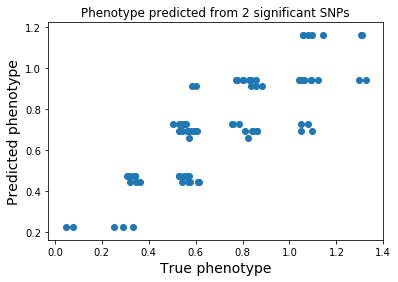

In [59]:
# Essayons de prédire y avec ce modèle
y_pred = model.predict(X_sig)

# Regardons visuellement à quel point nos prédictions sont proches de la réalité
plt.scatter(y, y_pred)
plt.xlabel("True phenotype", fontsize=14)
plt.ylabel("Predicted phenotype", fontsize=14)
plt.title("Phenotype predicted from 2 significant SNPs")
plt.show(block=False)

Il est aussi possible d'utiliser `scikit-learn` pour quantifier la qualité de ces prédictions grâce à la __proportion de variance expliquée__

In [62]:
from sklearn import metrics
print(metrics.explained_variance_score(y, y_pred))

0.697490094731


__Question__ Quelle est la proportion de variance expliquée par les SNPs significativement associés au phénotype par PLINK ?

__Réponse__ 70% de la variance expliquée.

Rappelez-vous que nous travaillons sur des données simulées. Par contraste, les SNPs associés à la taille humaine expliquent seulement 12% de la variance phénotypique, bien que l'on estime qu'environ 80% de ce phénotype est héritable, ce qui illustre le problème dit de l'_héritabilité manquante_. 

Nous allons maintenant appliquer des techniques de machine learning pour essayer de détecter plus de SNPs susceptibles d'expliquer notre phénotype.

## 2.2 Lasso

Pour cela, nous allons utiliser un Lasso. Le Lasso trouve une combinaison linéaire de SNPs qui explique au mieux le phénotype, et a un mécanisme intrinsèque (la _régularisation l1_) qui permet de créer un modèle _parcimonieux_ (ou _sparse_), c'est-à-dire un modèle qui utilise le moins de SNPs possible.

Pour ce faire, le Lasso minimise une somme de deux termes : l'erreur quadratique moyenne entre phénotype prédit et phénotype réel, et le terme de régularisation. Le terme de régularisation est la somme des valeurs absolues des coefficients de la régression linéaire. Il est donc faible quand beaucoup de features ont un coefficient de régression nul.

L'importance relative des deux termes (erreurs et régularisation) est controllée par un paramètre de régularisation (`alpha` dans `scikit-learn`). Plus `alpha` est grand, plus le terme de régularisation a d'importance, et moins il y aura de SNPs dans le modèle.

Nous allons commencer par observer le comportement du Lasso pour plusieurs valeurs de `alpha` avant de voir comment le déterminer de manière automatique.

http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

3 selected SNPs


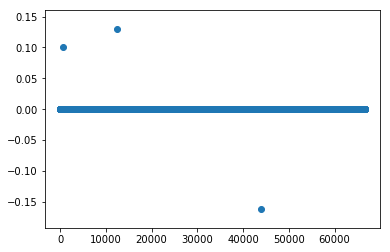

In [65]:
# Créer un modèle Lasso avec un paramètre de régularisation de 0.05
lasso = linear_model.Lasso(alpha=0.05)
# Entraîner le modèle sur les données
lasso.fit(X, y)
# Détecter les indices des SNPs qui ont des coefficients non nuls
selected_snps = np.where(lasso.coef_)[0]
# Les compter
print(len(selected_snps), "selected SNPs")
# Visualiser the coefficients
plt.scatter(range(lasso.coef_.shape[0]), # x-axis = SNPs
            lasso.coef_, # y-axis = SNP weight
            )
plt.show(block=False)

__Question__ Combien de SNPs le Lasso avec un paramètre de régularisation de 0.05 a-t-il sélectionné ? Quelle est leur p-valeur selon PLINK ? 

In [89]:
for idx in selected_snps :
    print(df_sorted[df_sorted.SNP == df.columns[6+idx]][["SNP","P"]])

            SNP         P
683  rs12045968  0.000007
            SNP             P
12345  rs920160  2.870000e-08
             SNP             P
43968  rs1015896  5.608000e-13


__Réponse__ 3 SNP sélectionnés.

__Question__ Quel est le pourcentage de variance expliqué par ces SNPs ?

In [90]:
ypred = lasso.predict(X)
print(metrics.explained_variance_score(y, ypred))

0.762636664915


__Réponse__ 76%

__Question__ Reprendre ces analyses pour `alpha=0.1` et `alpha=0.02`. Qu'observerez-vous ?

2 selected SNPs


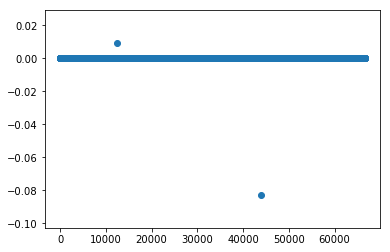

            SNP             P
12345  rs920160  2.870000e-08
             SNP             P
43968  rs1015896  5.608000e-13
0.259114688938
6 selected SNPs


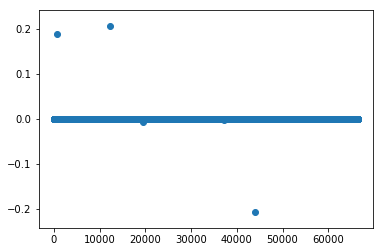

            SNP         P
683  rs12045968  0.000007
            SNP             P
12345  rs920160  2.870000e-08
             SNP         P
19480  rs1439279  0.002429
              SNP         P
37206  rs10964854  0.007227
             SNP             P
43968  rs1015896  5.608000e-13
             SNP        P
48589  rs7965447  0.02856
0.938896281278


In [94]:
# Créer un modèle Lasso avec un paramètre de régularisation de 0.1
lasso = linear_model.Lasso(alpha=0.1)
# Entraîner le modèle sur les données
lasso.fit(X, y)
# Détecter les indices des SNPs qui ont des coefficients non nuls
selected_snps = np.where(lasso.coef_)[0]
# Les compter
print(len(selected_snps), "selected SNPs")
# Visualiser the coefficients
plt.scatter(range(lasso.coef_.shape[0]), # x-axis = SNPs
            lasso.coef_, # y-axis = SNP weight
            )
plt.show(block=False)

for idx in selected_snps :
    print(df_sorted[df_sorted.SNP == df.columns[6+idx]][["SNP","P"]])
ypred = lasso.predict(X)
print(metrics.explained_variance_score(y, ypred))
   
# Créer un modèle Lasso avec un paramètre de régularisation de 0.02
lasso = linear_model.Lasso(alpha=0.02)
# Entraîner le modèle sur les données
lasso.fit(X, y)
# Détecter les indices des SNPs qui ont des coefficients non nuls
selected_snps = np.where(lasso.coef_)[0]
# Les compter
print(len(selected_snps), "selected SNPs")
# Visualiser the coefficients
plt.scatter(range(lasso.coef_.shape[0]), # x-axis = SNPs
            lasso.coef_, # y-axis = SNP weight
            )
plt.show(block=False)

for idx in selected_snps :
    print(df_sorted[df_sorted.SNP == df.columns[6+idx]][["SNP","P"]])

ypred = lasso.predict(X)
print(metrics.explained_variance_score(y, ypred))


__Réponse__ Avec alpha = 0.1, on a 26% de la variance expliquée et avec alpha = 0.02, on a 94% de la variance expliquée. On oberve que plus alpha est petit, plus le pourcentage de variance expliquée augmente, donc on sélectionne plus de SNPs.

## 2.3 Validation croisée du Lasso

Quelle valeur de `alpha` choisir ? Dans une grille de possibilités (c'est-à-dire, ici, une liste de valeurs de `alpha`), nous allons choisir la valeur qui donne le modèle le plus performant _en validation croisée_.

`scikit-learn` nous permet de le faire de façon transparente grâce à http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html.

In [96]:
# Initialiser un modèle Lasso avec une validation croisée interne à 5 folds.
lasso_cv = linear_model.LassoCV(cv=5)
# Entraîner ce modèle sur les données
lasso_cv.fit(X, y)

# Quelle est la valeur optimale de alpha ?
print("Optimal alpha:", lasso_cv.alpha_)

Optimal alpha: 0.0110172338489


__Question__ Quelle est la valeur optimale de `alpha` ? Combien de SNPs sont sélectionnés ? Quelle est le pourcentage de variance expliquée ?

25 selected SNPs


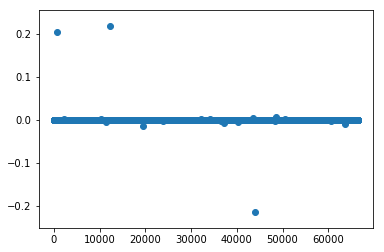

            SNP         P
683  rs12045968  0.000007
            SNP         P
2187  rs1884018  0.003032
            SNP         P
10274  rs768180  0.000954
             SNP       P
11504  rs2675173  0.0357
            SNP             P
12345  rs920160  2.870000e-08
             SNP         P
19480  rs1439279  0.002429
             SNP        P
23952  rs4711069  0.02891
             SNP        P
31244  rs7801395  0.01709
             SNP        P
32255  rs1471026  0.00661
             SNP        P
33344  rs1866739  0.04651
             SNP         P
34052  rs6471328  0.000273
             SNP         P
36614  rs1926370  0.002673
              SNP         P
37206  rs10964854  0.007227
            SNP         P
40259  rs705670  0.002869
            SNP         P
43512  rs307388  0.003693
             SNP             P
43968  rs1015896  5.608000e-13
              SNP         P
48263  rs10745844  0.002886
             SNP         P
48356  rs1356441  0.000228
             SNP        P
48589 

In [97]:
# Créer un modèle Lasso avec un paramètre de régularisation de 0.0110172338489
lasso = linear_model.Lasso(alpha=0.0110172338489)
# Entraîner le modèle sur les données
lasso.fit(X, y)
# Détecter les indices des SNPs qui ont des coefficients non nuls
selected_snps = np.where(lasso.coef_)[0]
# Les compter
print(len(selected_snps), "selected SNPs")
# Visualiser the coefficients
plt.scatter(range(lasso.coef_.shape[0]), # x-axis = SNPs
            lasso.coef_, # y-axis = SNP weight
            )
plt.show(block=False)

for idx in selected_snps :
    print(df_sorted[df_sorted.SNP == df.columns[6+idx]][["SNP","P"]])

ypred = lasso.predict(X)
print(metrics.explained_variance_score(y, ypred))

__Réponse__ On obtient un alpha optimal de 0.0110172338489. 25 SNPs sont sélectionnés. 97% de la variance est expliquée. 

### Surapprentissage 

Vous venez normalement d'observer que l'on arrive à expliquer la quasi-totalité de la variance phénotypique avec quelques dizaines de SNPs. 

Cela pourrait-il être trop beau pour être vrai, et être lié à un phénomène de _surapprentissage_ ? Nous venons d'évaluer notre modèle de régression linéaire sur les mêmes données que celles que nous avons utilisées pour le construire. Marcherait-il aussi bien sur des individus que nous n'avons jamais vu ? Pour évaluer cette situation, nous allons recommencer les expériences ci-dessus en utilisant uniquement deux tiers de notre cohorte pour l'exploration (=la sélection de SNPs), et le tiers restant pour la validation.

__Attention__ Utiliser uniquement 2/3 de nos échantillons pour la sélection réduit la puissance statistique de nos analyses...

In [99]:
# Séparons nos données en un jeu pour l'exploration et un de validation
from sklearn import model_selection
X_explo, X_val, y_explo, y_val = model_selection.train_test_split(X, y, test_size=0.33,
                                 random_state=42)

__Question__ Entrainer de nouveau un Lasso sur `(X_explo, y_explo)`, mais cette fois utiliser une validation croisée en 3 folds car le jeu contient peu d'échantillons.

In [101]:
# Initialiser un modèle Lasso avec une validation croisée interne à 3 folds.
lasso_cv = linear_model.LassoCV(cv=3)
# Entraîner ce modèle sur les données
lasso_cv.fit(X_explo, y_explo)

# Quelle est la valeur optimale de alpha ?
print("Optimal alpha:", lasso_cv.alpha_)

Optimal alpha: 0.127623704826


__Question__ Quelle est maintenant la valeur optimale de `alpha` ?

__Réponse__ Alpha = 0.127623704826

__Question__ Quel pourcentage de variance les SNPs sélectionnés expliquent-ils _dans le jeu d'exploration_ ?

In [109]:
# Identifier les indices des SNPs significatifs dans X :
# ce sont les indices des SNPs significatifs dans df, moins 6 (nous avons exclu les 6 premières colonnes)
sig_indices = np.where(lasso_cv.coef_)[0]
# Restreindre X aux SNPs significatifs
X_sig = X_explo[:, sig_indices]

# Créer un modèle linéaire qui utilise les SNPs significatifs uniquement
model = linear_model.LinearRegression() # crée un objet "modèle de régression linéaire"
model.fit(X_sig, y_explo) # apprend ce modèle sur les SNPs significatifs
y_pred = model.predict(X_sig)
print(metrics.explained_variance_score(y_explo, y_pred))

0.412412524418


__Question__ Quel pourcentage de variance les SNPs sélectionnés expliquent-ils _dans le jeu de test_ ?

In [110]:
# Identifier les indices des SNPs significatifs dans X :
# ce sont les indices des SNPs significatifs dans df, moins 6 (nous avons exclu les 6 premières colonnes)
sig_indices = np.where(lasso_cv.coef_)[0]
# Restreindre X aux SNPs significatifs
X_sig = X_val[:, sig_indices]

# Créer un modèle linéaire qui utilise les SNPs significatifs uniquement
from sklearn import linear_model
model = linear_model.LinearRegression() # crée un objet "modèle de régression linéaire"
model.fit(X_sig, y_val) # apprend ce modèle sur les SNPs significatifs
y_pred = model.predict(X_sig)
print(metrics.explained_variance_score(y_val, y_pred))

0.00335918042927


__Commentaire__ On a 40% de la variance expliquée dans le jeu d'exploration et 0.3% de la variance expliquée dans le jeu de test.

# 3. Pour aller plus loin

Quelques pistes à explorer si vous souhaitez aller plus loin dans l'exploration des données :

### Stabilité
Appliquez les techniques ci-dessus (PLINK ou Lasso) à 90% des échantillons, sélectionnés au hasard, et répétez la procédure plusieurs fois. Obtenez-vous systématiquement les mêmes SNPs ?

Le Lasso est connu pour être instable en présence de corrélation entre les variables (ce qui est le cas des SNPs, en particulier à cause du déséquilibre de liaison), et il est très probable que vous obteniez des résultats différents sauf peut-être pour les 2-3 SNPs les plus associés au phénotype. Quelle conséquence cela a-t-il sur l'interprétabilité des résultats ?

### Elastic Net

Elastic Net est une façon de stabiliser le Lasso : il mélange la parcimonie du Lasso avec l'effet de sélection groupée d'une régularisation l2 (régression ridge). Vous le trouverez dans `sklearn.linear_model.ElasticNet` (voir http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html et http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNetCV.html). 

Si vous utilisez ElasticNet à la place du Lasso, comment cela affecte-t-il le nombre de SNPs sélectionnés ? Le pourcentage de variance expliquée sur le jeu de validation ? La stabilité des résultats ?